<a href="https://colab.research.google.com/github/tiprock-network/predictbirthTime-ML/blob/main/birthtimePred_sklearn_DF.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Gradient Boost Regressor with Scikit Learn
![Sklearn](https://github.com/tiprock-network/predictbirthTime-ML/blob/main/sklearn.png?raw=true)

In [ ]:
#import necessary tools
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Importing the data set


In [ ]:
from pyexpat import features
from sklearn import datasets


dataset=pd.read_csv('labourward2.csv')
dataset.head()



,systolic,diastolic,BMI,momWeight/10,timeValueinHrs
0,110,80,19.3,5.59,20.33
1,124,86,18.5,5.59,7.25
2,110,80,19.3,5.59,15.50
3,124,86,25.1,5.59,9.35
4,122,76,19.3,5.59,20.22


Change into a numpy array

In [ ]:
x=np.array(dataset[['systolic','diastolic','BMI','momWeight/10']])
print(f"{x.shape} is x size")

y=np.array(dataset['timeValueinHrs'])
print(f"{y.shape} is y size")

(101, 4) is x size
(101,) is y size


Split the data

In [ ]:
#test set and train set
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)




GBR Model

In [ ]:
import math

In [ ]:
#the model itself
gbr_model=GradientBoostingRegressor(n_estimators=200,max_depth=1,random_state=1)

#fit training data
gbr_model.fit(train_x,train_y)

#use test set to give prediction

y_hat=gbr_model.predict(test_x)




In [ ]:
#print predictions
#len(test_x) for range
for i in range(10):
    res=y_hat[i]
    m=(round((res-int(res))*60,0))/100
    h=math.trunc(res)
    time=m+h
    if time>0.0 and time<12.0:
     
     print(f"{test_x[i][0]}/{test_x[i][1]}mm/Hg \t{test_x[i][2]} BMI\t{round(test_x[i][3]*10,2)} kg  = Prediction: {time:0.2f} am")
    elif time>11.59 and time<23.59:
        time=round(time-12.00,2)#convert into 12hrs clock
        if time>=0.0 and time<=0.59:
         print(f"{test_x[i][0]}/{test_x[i][1]}mm/Hg \t{test_x[i][2]} BMI\t{round(test_x[i][3]*10,2)} kg = Prediction: {time+12.00:0.2f} pm")
        elif time>0.59:
         print(f"{test_x[i][0]}/{test_x[i][1]}mm/Hg \t{test_x[i][2]} BMI\t{round(test_x[i][3]*10,2)} kg = Prediction: {time:0.2f} pm")

112.0/64.0mm/Hg 	18.3 BMI	83.0 kg = Prediction: 4.06 pm
124.0/86.0mm/Hg 	22.7 BMI	75.0 kg = Prediction: 5.06 pm
124.0/86.0mm/Hg 	20.2 BMI	62.4 kg = Prediction: 2.16 pm
110.0/80.0mm/Hg 	23.4 BMI	85.0 kg  = Prediction: 9.35 am
108.0/62.0mm/Hg 	24.3 BMI	68.0 kg  = Prediction: 11.34 am
122.0/76.0mm/Hg 	24.3 BMI	77.0 kg = Prediction: 3.25 pm
112.0/64.0mm/Hg 	20.2 BMI	70.0 kg = Prediction: 3.34 pm
112.0/64.0mm/Hg 	24.3 BMI	76.5 kg = Prediction: 4.02 pm
110.0/80.0mm/Hg 	20.1 BMI	76.5 kg = Prediction: 4.22 pm
122.0/76.0mm/Hg 	20.2 BMI	70.0 kg = Prediction: 2.58 pm


#### GBR MODEL EVALUATION

In [ ]:
#get the RMSE of the model
tRMSE=MSE(test_y,y_hat)**0.5
print(f"RMSE value : {tRMSE:.2f}")

RMSE value : 5.78


In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
print(f"MSE root: {np.sqrt(mean_squared_error(test_y,y_hat))}")
print(f"MAE root: {np.sqrt(mean_absolute_error(test_y,y_hat))}")

MSE root: 7.055525360700418
MAE root: 2.3151137371463357


## Visualizing the Model

In [ ]:
params = {
    "n_estimators": 200,
    "max_depth": 1,
    "min_samples_split": 5,
    "learning_rate": 0.01,
    "loss": "squared_error",
}

c:\Users\theop\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:103: FutureWarning: Attribute `loss_` was deprecated in version 1.1 and will be removed in 1.3.
  warnings.warn(msg, category=FutureWarning)


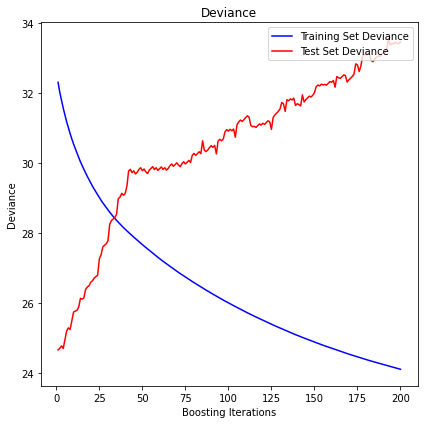

In [ ]:
test_score = np.zeros((params["n_estimators"],), dtype=np.float64)
for i, y_pred in enumerate(gbr_model.staged_predict(test_x)):
    test_score[i] = gbr_model.loss_(test_y, y_pred)

fig = plt.figure(figsize=(6, 6))
plt.subplot(1, 1, 1)
plt.title("Deviance")
plt.plot(
    np.arange(params["n_estimators"]) + 1,
    gbr_model.train_score_,
    "b-",
    label="Training Set Deviance",
)
plt.plot(
    np.arange(params["n_estimators"]) + 1, test_score, "r-", label="Test Set Deviance"
)
plt.legend(loc="upper right")
plt.xlabel("Boosting Iterations")
plt.ylabel("Deviance")
fig.tight_layout()
plt.show()

### Feature Importance
Features to consider

AttributeError: 'DataFrame' object has no attribute 'feature_names'

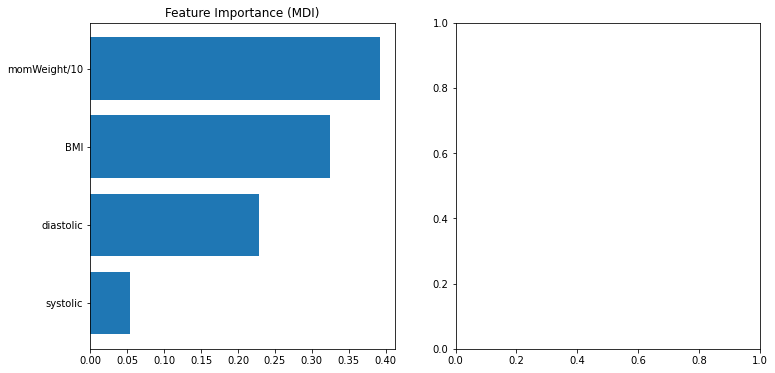

In [ ]:
from sklearn.inspection import permutation_importance


feature_importance = gbr_model.feature_importances_
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + 0.5
fig = plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(pos, feature_importance[sorted_idx], align="center")
plt.yticks(pos, np.array(['systolic','diastolic','BMI','momWeight/10'])[sorted_idx])
plt.title("Feature Importance (MDI)")

result = permutation_importance(
    gbr_model, test_x, test_y, n_repeats=10, random_state=42, n_jobs=2
)
sorted_idx = result.importances_mean.argsort()
plt.subplot(1, 2, 2)
plt.boxplot(
    result.importances[sorted_idx].T,
    vert=False,
    labels=np.array(dataset.feature_names)[sorted_idx],
)
plt.title("Permutation Importance (test set)")
fig.tight_layout()
plt.show()